# Non Linear Classification

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/NLS_Group22.txt"

In [13]:
data = pd.read_csv(path, header=None, delimiter=" ")
data = pd.DataFrame(data)

In [12]:
class1 = data.iloc[:500]
class2 = data.iloc[501:1001]
class3 = data.iloc[1001:2000]
class1

,0,1,2
0,-0.266484,0.574908,NaN
1,-0.336049,0.648162,NaN
2,0.886191,1.179274,NaN
3,1.552619,1.225525,NaN
4,1.831822,0.585167,NaN
...,...,...,...
495,2.390516,0.237797,NaN
496,0.860039,1.411000,NaN
497,2.339808,-0.307577,NaN
498,2.346042,0.367304,NaN


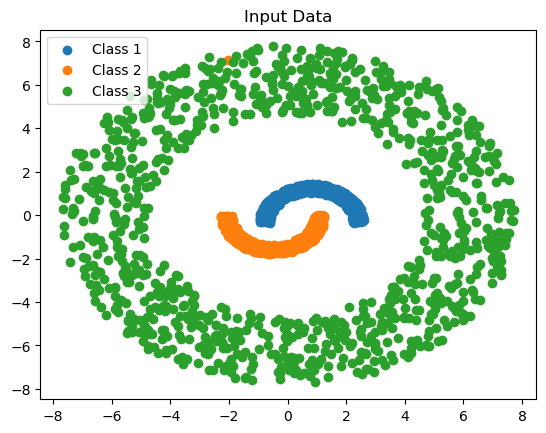

In [20]:
plt.scatter(class1[0], class1[1])
plt.scatter(class2[0], class2[1])
plt.scatter(class3[0], class3[1])

plt.legend(['Class 1','Class 2','Class 3'])
plt.title("Input Data")
plt.show()

In [14]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    print(l1, l2)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [15]:
training1, validation1, test1 = split_data(class1)
print(training1.shape, validation1.shape, test1.shape)

training2, validation2, test2 = split_data(class2)
print(training2.shape, validation2.shape, test2.shape)

training3, validation3, test3 = split_data(class3)
print(training3.shape, validation3.shape, test3.shape)

300 400
(300, 3) (100, 3) (100, 3)
300 400
(300, 3) (100, 3) (100, 3)
599 798
(599, 3) (199, 3) (201, 3)
